In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
#from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random 
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
train_path = r'D:\senior year\GP\datasets\scriba-dataset\train'
# valid_path = r'D:\senior year\GP\datasets\ragaadataset\AFULL-CLASSES\10 classes with validation\valid'
test_path = r'D:\senior year\GP\datasets\scriba-dataset\test'

#print('total dataset is 4220 image:')
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, 
    target_size=(224,224),
    batch_size=10)

# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=valid_path,
#     target_size=(224,224), 
#     batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    batch_size=10, 
    shuffle=False)

Found 3538 images belonging to 87 classes.
Found 870 images belonging to 87 classes.


In [26]:
mobile= tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [27]:
x = mobile.layers[-6].output #hakhod al hidden layers mn mobile kolo ela akher 6
x

<tf.Tensor 'global_average_pooling2d_1/Mean:0' shape=(None, 1024) dtype=float32>

In [28]:
output =  Dense(units=87, activation ='softmax')(x)
#dense new hidden layer

In [29]:
model = Model(inputs=mobile.input, outputs=output) #new model x + dense layer

In [30]:
for layer in model.layers[:-23]: #only train the last 23 layers in our new model
    layer.trainable=False 

In [31]:
model.summary() #our new model (model-6 + dense)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [32]:
model.compile(optimizer=Adam(lr=0.0100), loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
import time

start = time.time()
history = model.fit(x=train_batches,
#          steps_per_epoch=len(train_batches), #no batch size, kol epoch btakhod kol al train images
                     batch_size=32,
#          validation_data=valid_batches,
#          validation_steps=len(valid_batches),
         epochs=20,
         verbose=2)
stop = time.time()
print(f"Training time: {(stop - start)/60} min")
#val watya acc 3alya = overfitting

Epoch 1/20
354/354 - 124s - loss: 2.1568 - accuracy: 0.5639
Epoch 2/20
354/354 - 131s - loss: 0.2695 - accuracy: 0.9183
Epoch 3/20
354/354 - 126s - loss: 0.1196 - accuracy: 0.9647
Epoch 4/20
354/354 - 125s - loss: 0.0738 - accuracy: 0.9791
Epoch 5/20
354/354 - 124s - loss: 0.1004 - accuracy: 0.9737
Epoch 6/20
354/354 - 127s - loss: 0.1255 - accuracy: 0.9683
Epoch 7/20
354/354 - 125s - loss: 0.0466 - accuracy: 0.9887
Epoch 8/20
354/354 - 125s - loss: 0.1217 - accuracy: 0.9703
Epoch 9/20
354/354 - 125s - loss: 0.0794 - accuracy: 0.9788
Epoch 10/20
354/354 - 127s - loss: 0.0451 - accuracy: 0.9850
Epoch 11/20
354/354 - 127s - loss: 0.0639 - accuracy: 0.9799
Epoch 12/20
354/354 - 125s - loss: 0.0651 - accuracy: 0.9830
Epoch 13/20
354/354 - 125s - loss: 0.0733 - accuracy: 0.9808
Epoch 14/20
354/354 - 127s - loss: 0.0364 - accuracy: 0.9907
Epoch 15/20
354/354 - 126s - loss: 0.0669 - accuracy: 0.9845
Epoch 16/20
354/354 - 125s - loss: 0.0307 - accuracy: 0.9924
Epoch 17/20
354/354 - 126s - loss

In [34]:
test_labels = test_batches.classes
# test_labels

In [35]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [36]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
cm

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0, 10]], dtype=int64)

In [37]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    #this function prints and plots the confusion matrix
    plt.figure(figsize = (50,50))
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                horizontalalignment = "center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('true/real label')
    plt.xlabel('predicted label')

In [38]:
# test_batches.class_indices

In [39]:
number_of_classes = 87
cm_plot_labels = []
for i in range(0, number_of_classes):
    cm_plot_labels.append(i)
    
# print(cm_plot_labels)    

confusion matrix, without normalization
[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0 10]]


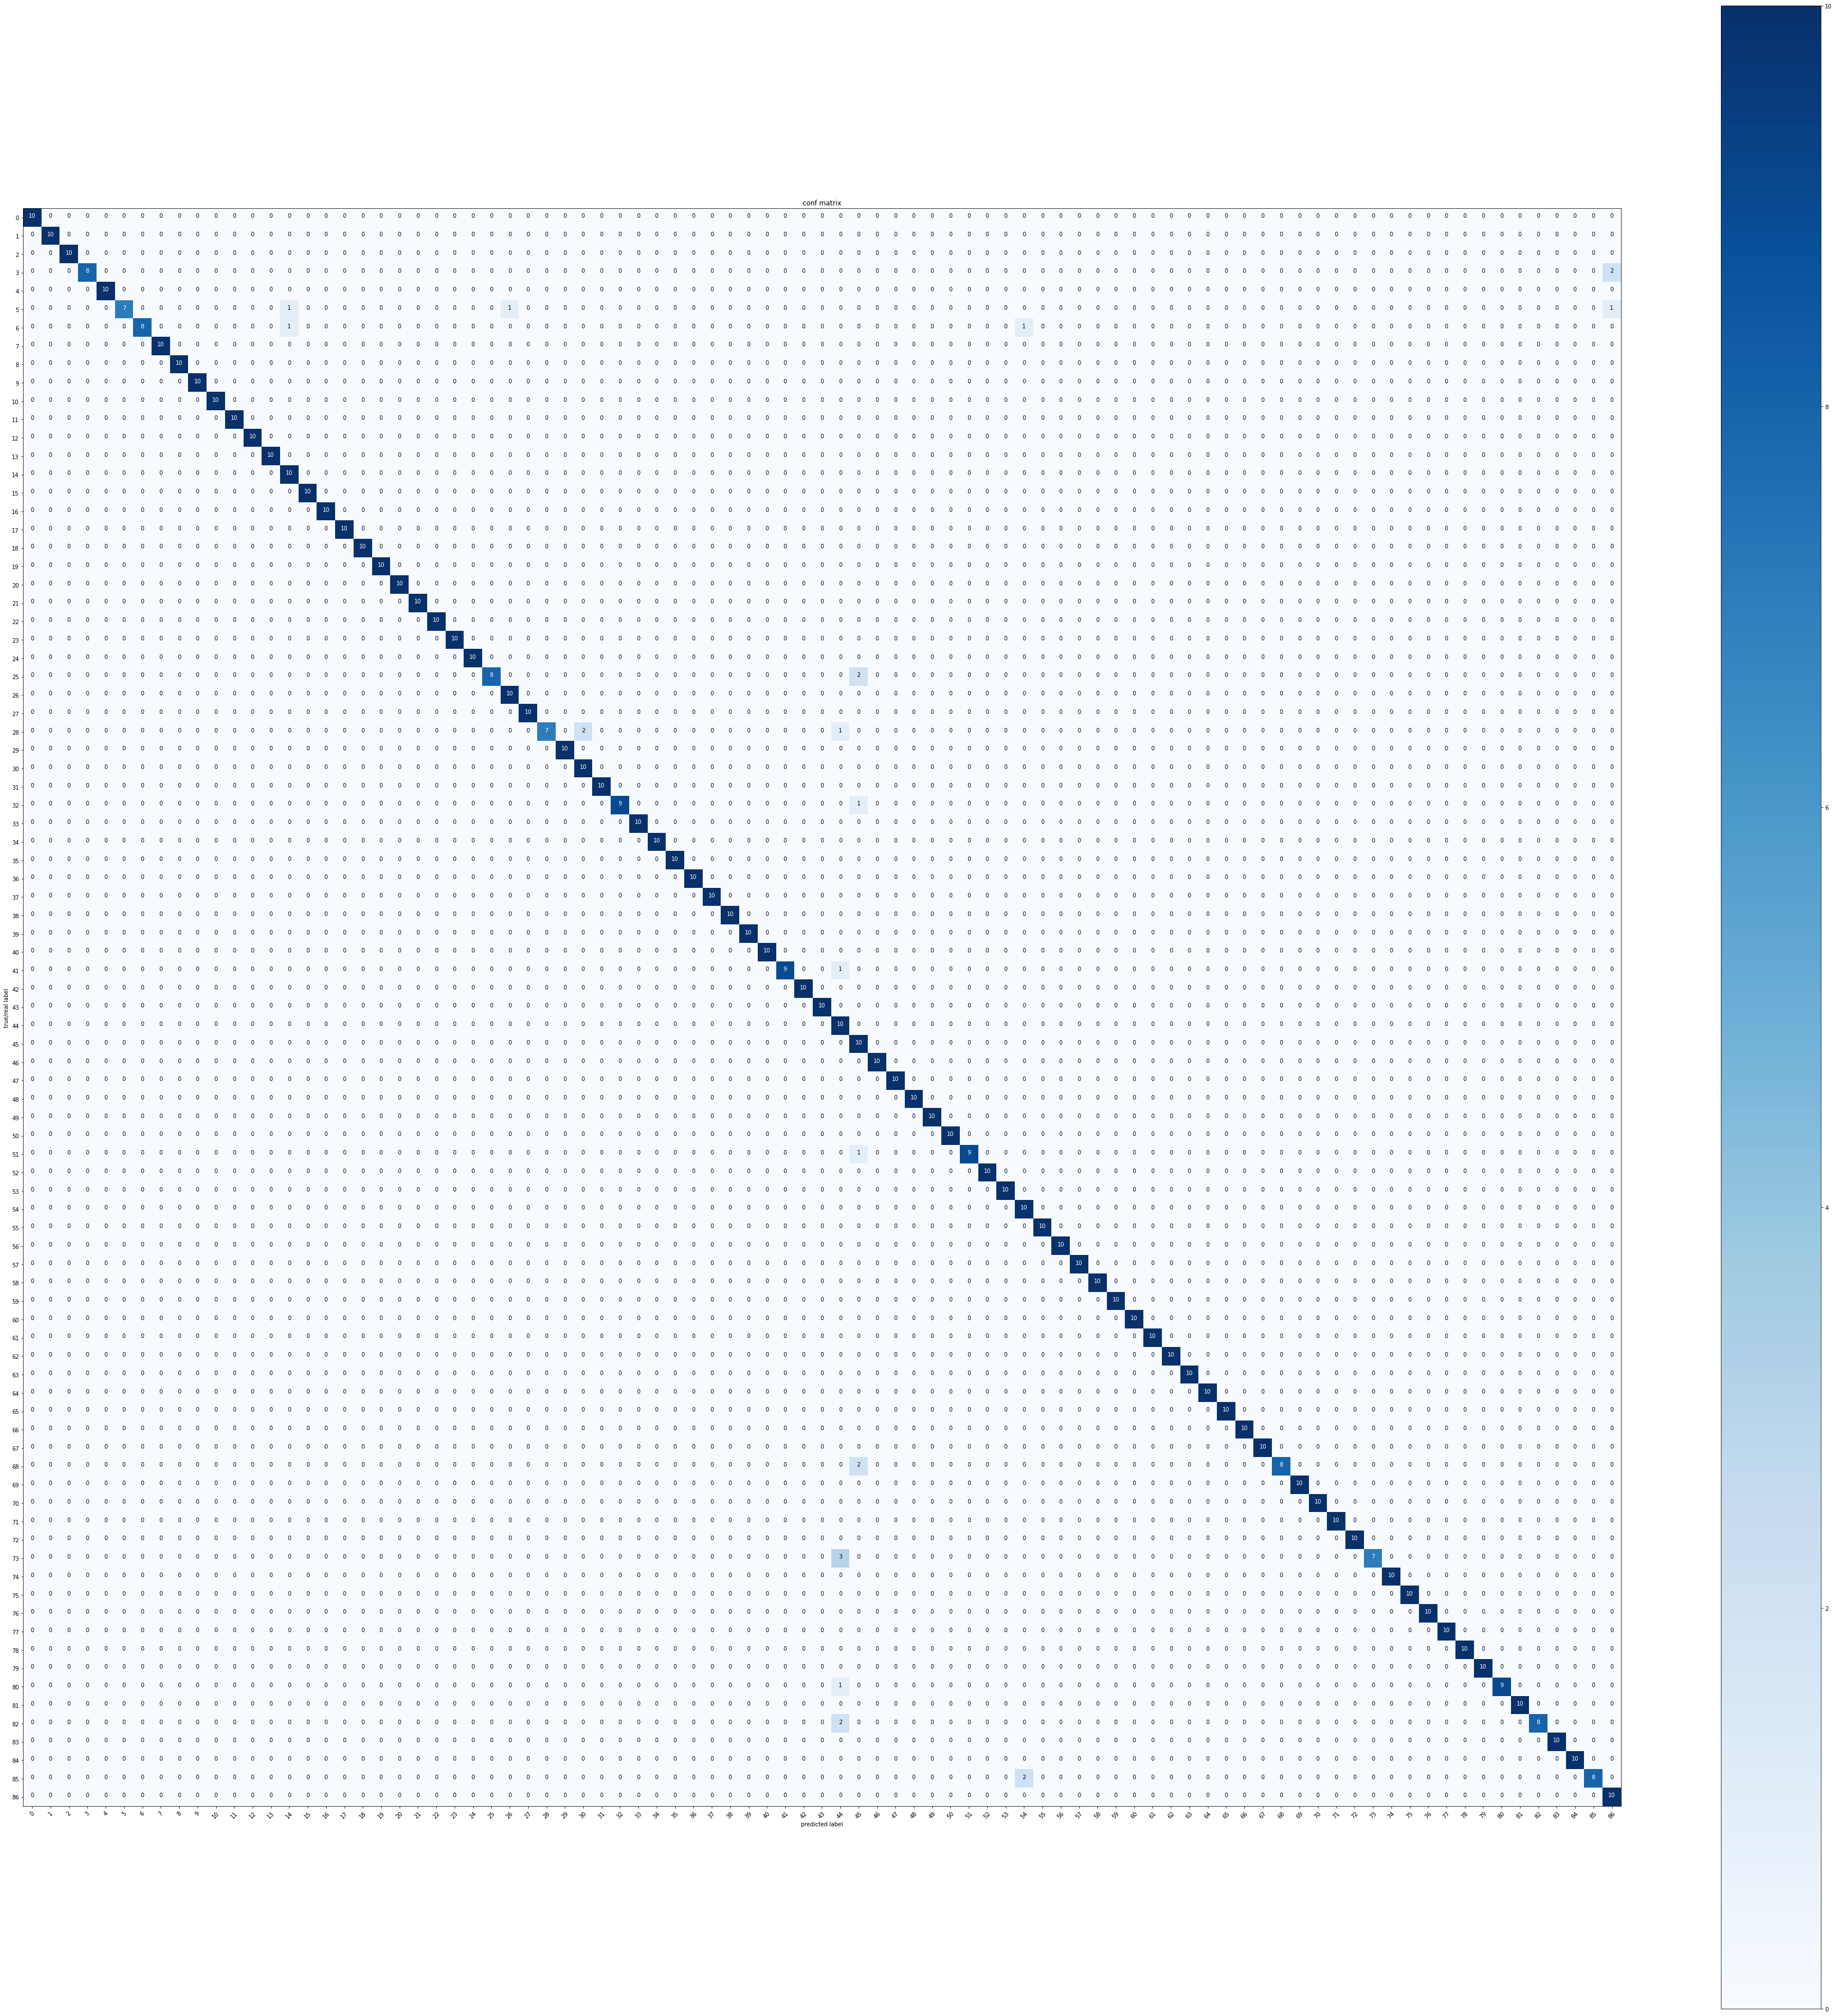

In [40]:
# cm_plot_labels=['0','1','2','3','4','5','6','7','8','9']
# cm_plot_labels=['0','1','2','3','4']
# cm_plot_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="conf matrix")

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# test_x=np.array(test_samples)
# y_pred=model.predict(test_x)
# y_pred=np.argmax(y_pred,axis=1)

y_pred=predictions.argmax(axis=1)
print(classification_report(y_pred,test_batches.classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       0.80      1.00      0.89         8
           4       1.00      1.00      1.00        10
           5       0.70      1.00      0.82         7
           6       0.80      1.00      0.89         8
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.83      0.91        12
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

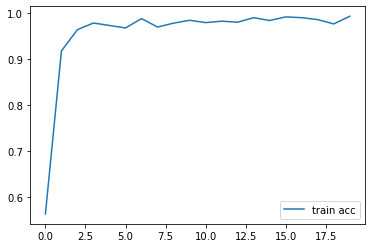

In [42]:
plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()